# Taller final ML2 : Clustering de países basado en las condiciones socioeconómicas


## Santiago Velásquez
 santiago.velasquez4@udea.edu.co - 1036647710

 ## Carolina González Marín
 carolina.gonzalezm1@udea.edu.co - 1017251647

### Objetivo del ejercicio: Este dataset fue extraído de Kaggle. El objetivo es ayudar a HELP INTERNATIONAL (ONG de carácter humanitario que ayuda a combatir la pobreza) a identificar cuáles son los países que más requieren ayuda para distribuir 10 millones de dólares que han levantado recientemente de la manera más efectiva posible.

In [252]:
import pandas as pd
import numpy as np
import sweetviz as sv
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler


from sklearn.pipeline import Pipeline

from sklearn.decomposition import PCA

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances_argmin_min

import joblib

In [5]:
data = pd.read_csv('../data/raw/Country-data.csv')

## Comprobaciones básicas del dataset

In [6]:
data.head(50)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.00,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.40,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.50,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.90,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.80,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.80,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.30,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.30,5.88,20.7,16000,13.800,69.1,1.92,5840


In [7]:
## Checking data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


No existen valores nulos en ninguna de las columnas, y los tipos de datos son correctos. Por ahora, no hay que realizar ningún ajuste en este sentido.

In [8]:
## Getting some basic stats
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


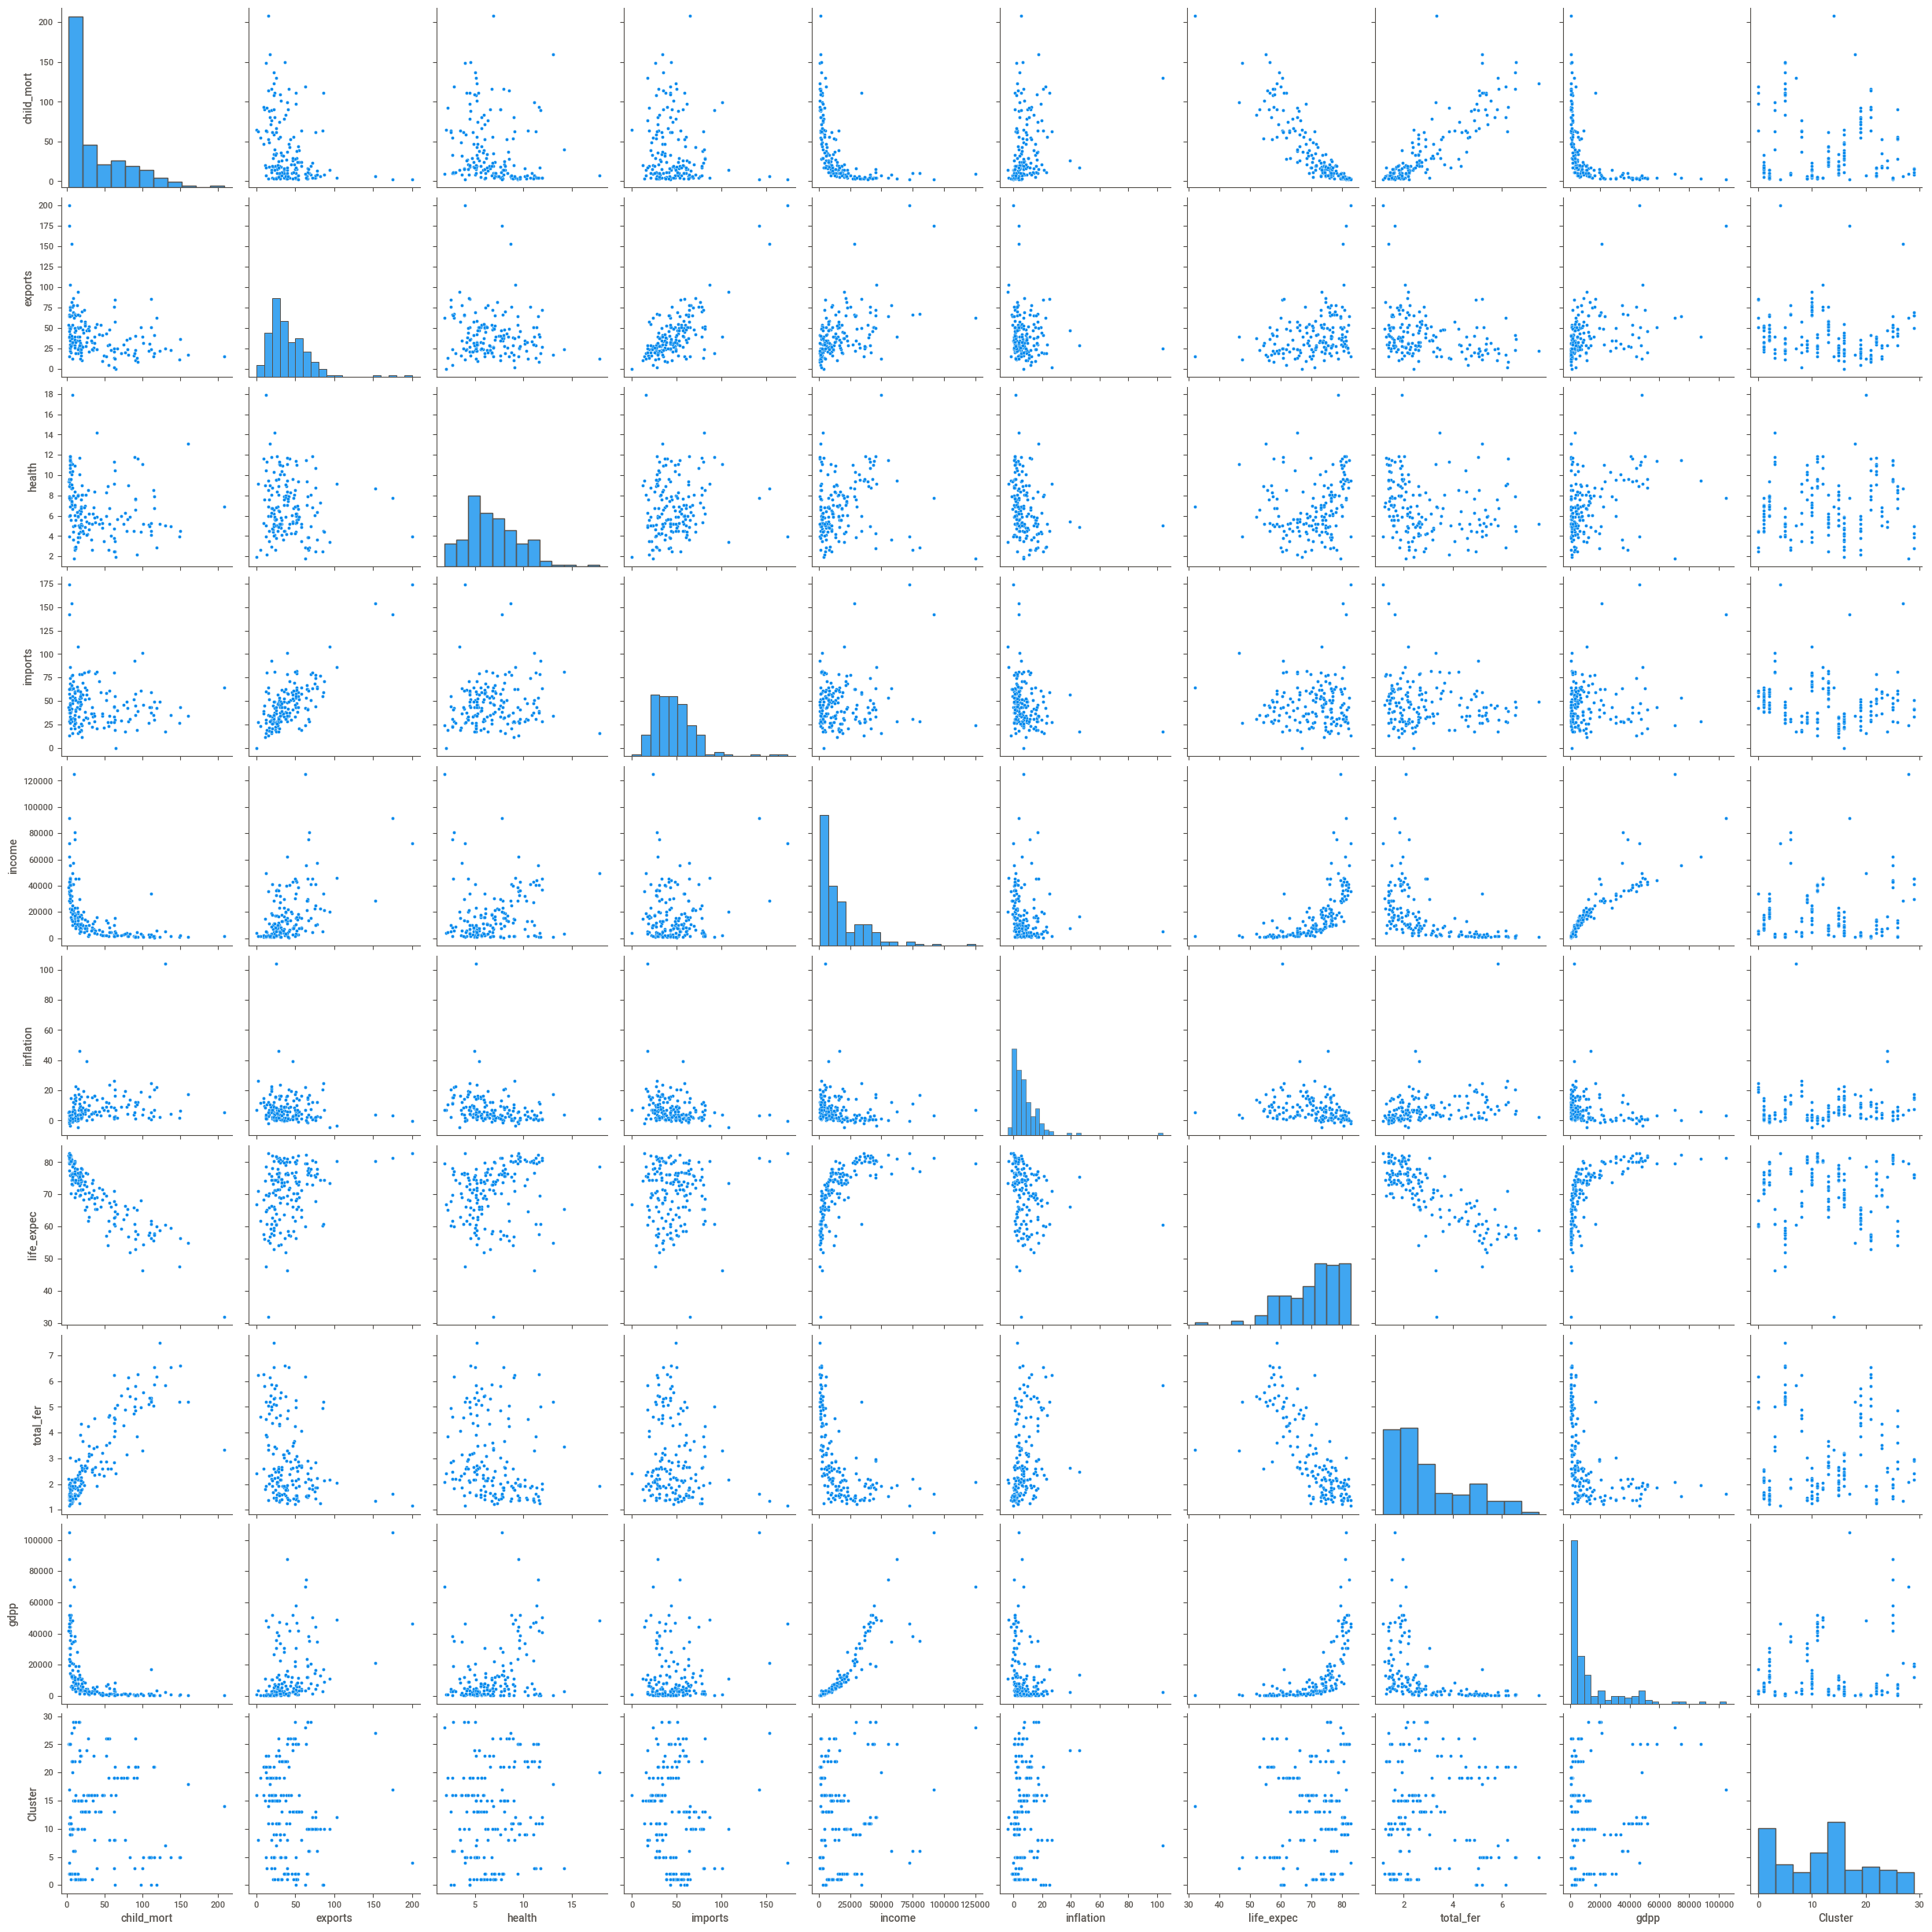

In [88]:
sns.pairplot(data)

## Generando un reporte de análisis exploratorio básico

In [10]:
eda_report = sv.analyze(data)

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report ../utils/eda_report.html was generated.



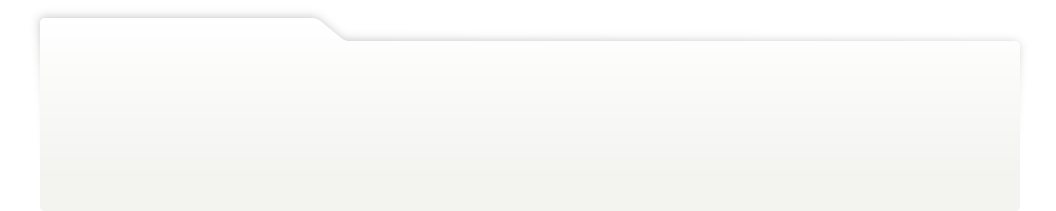
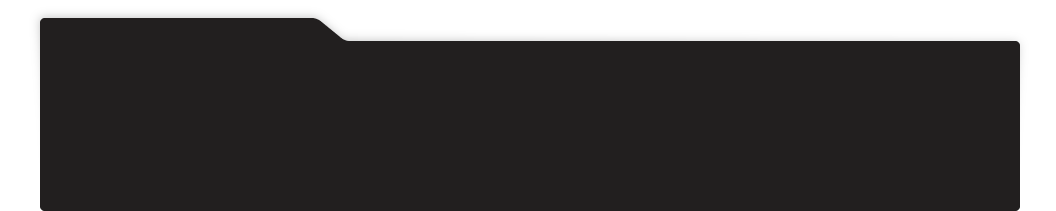
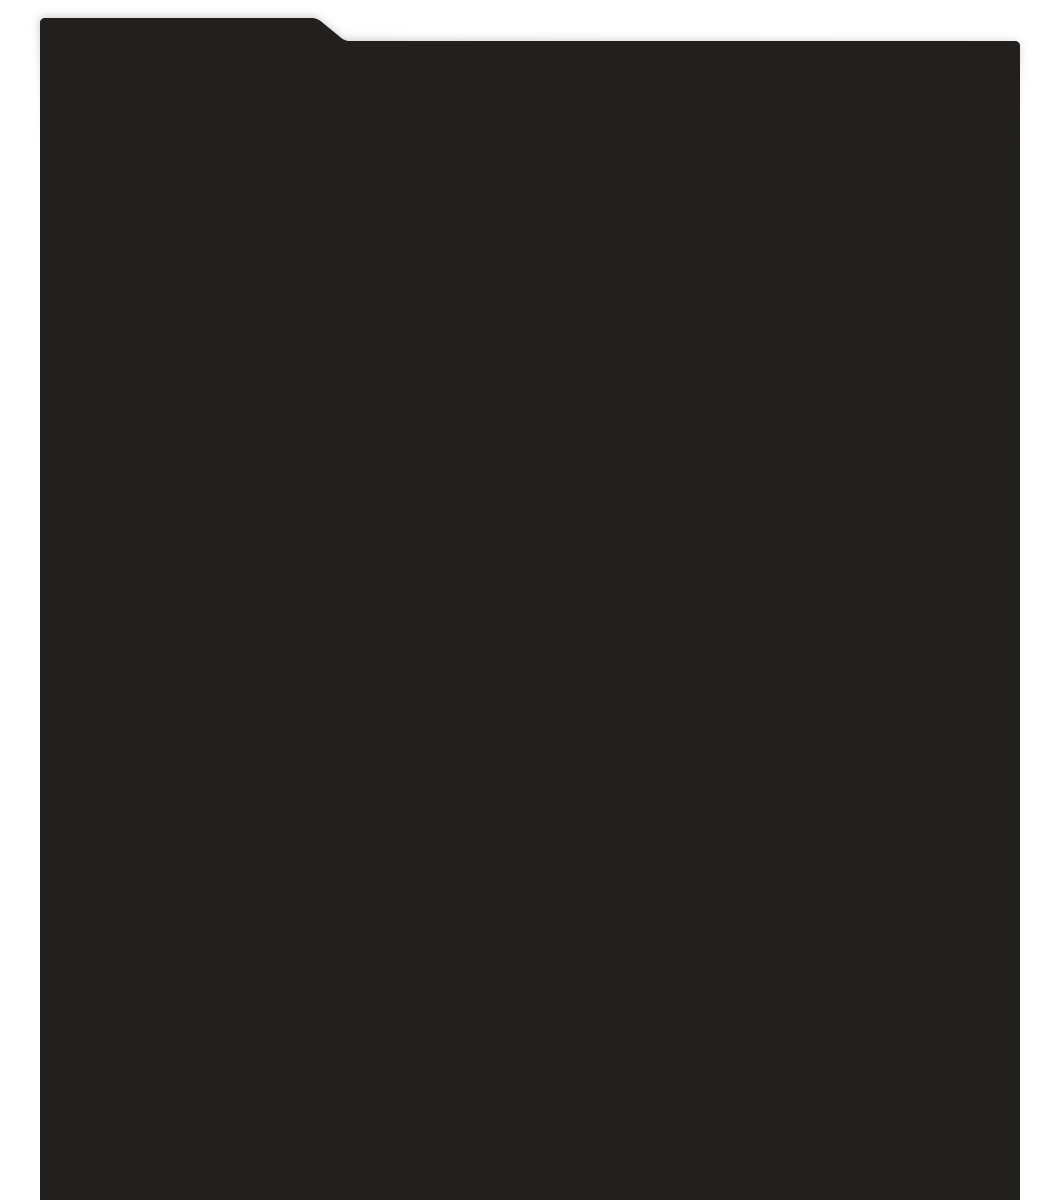
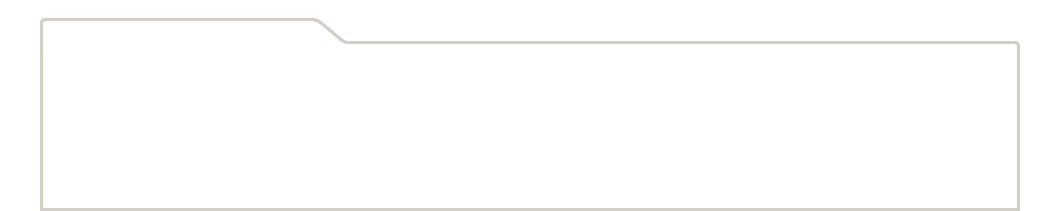
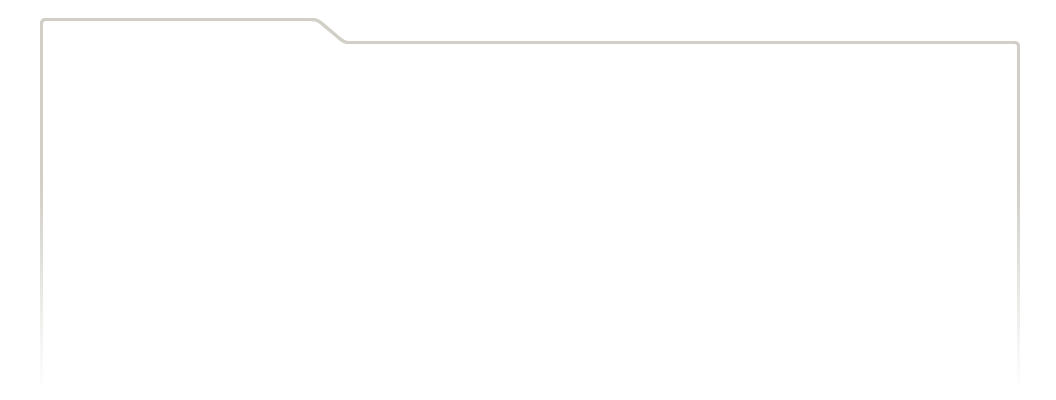
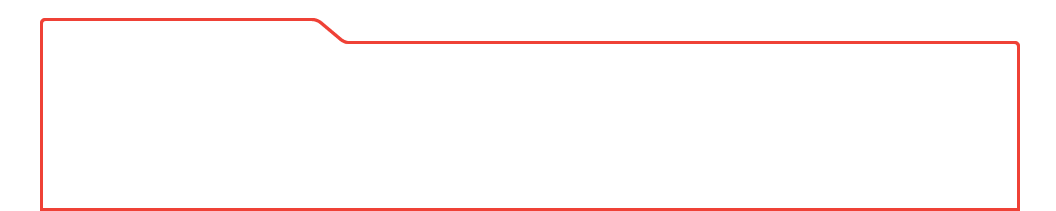
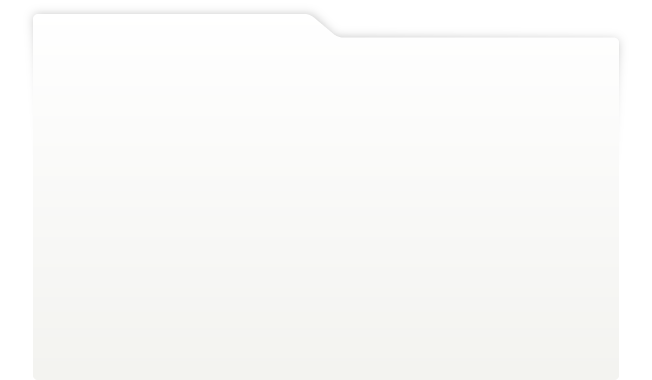
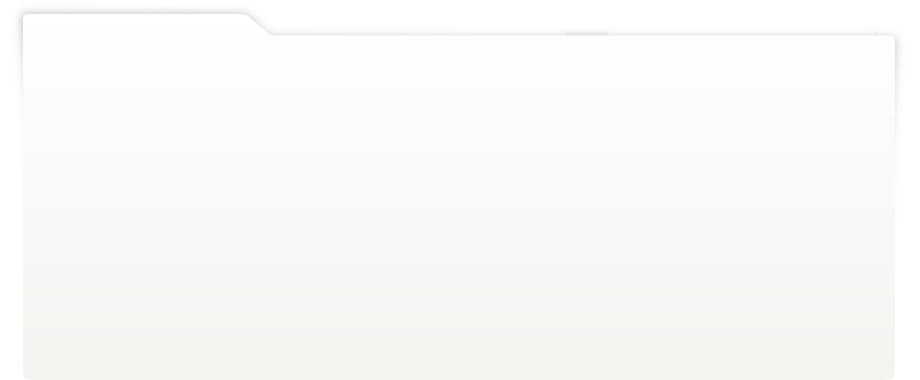
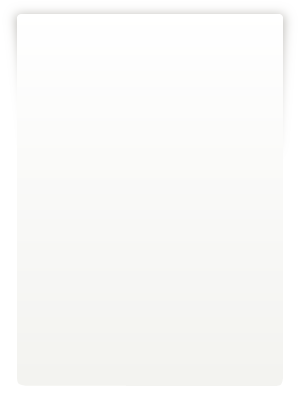
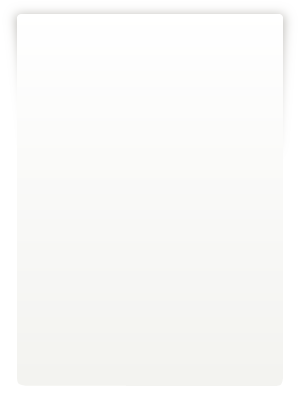
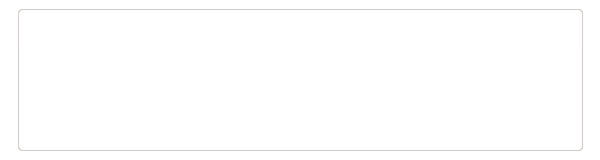
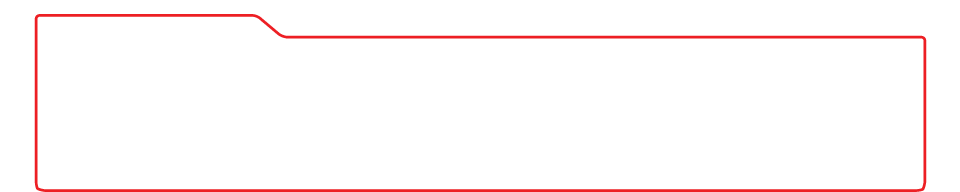
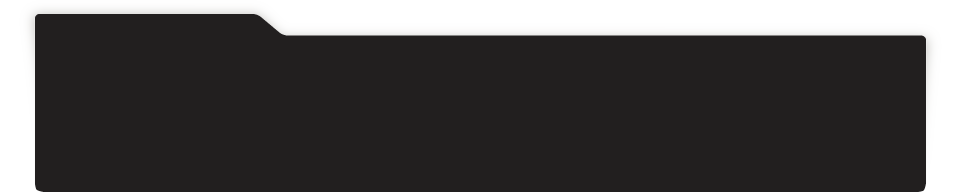
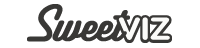
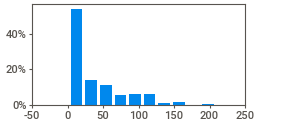
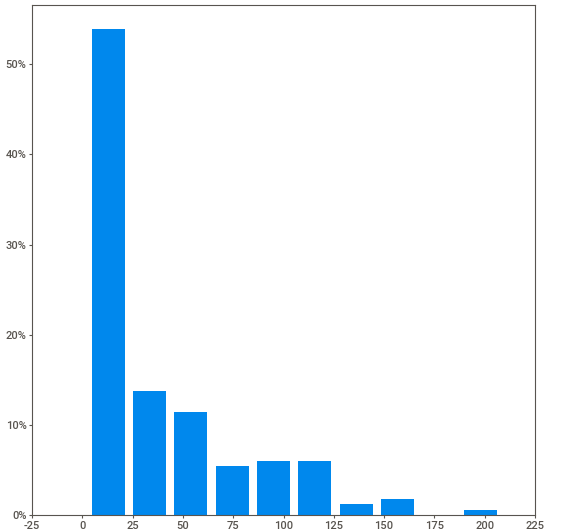
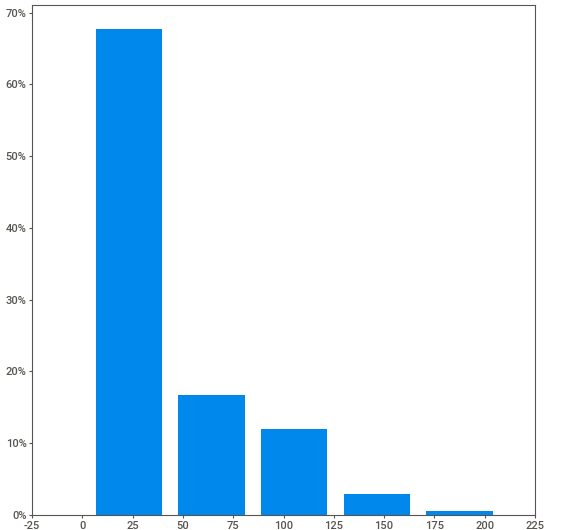
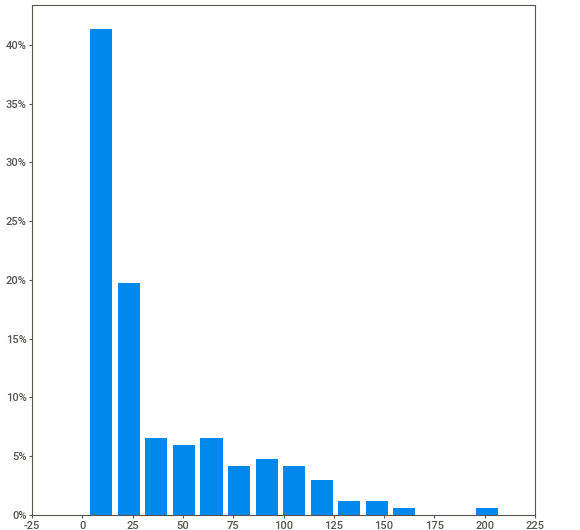
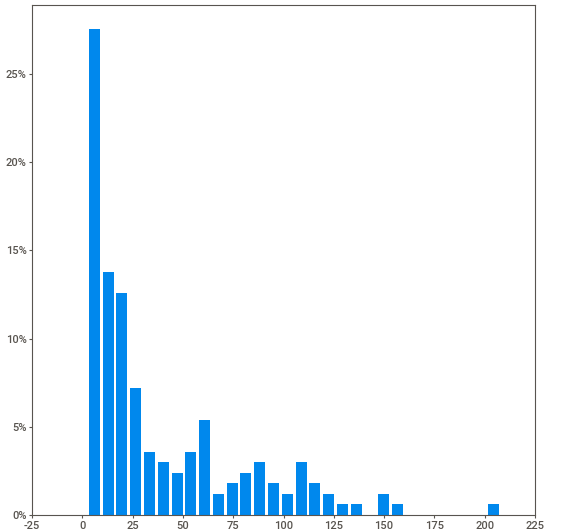
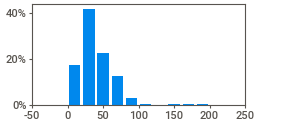
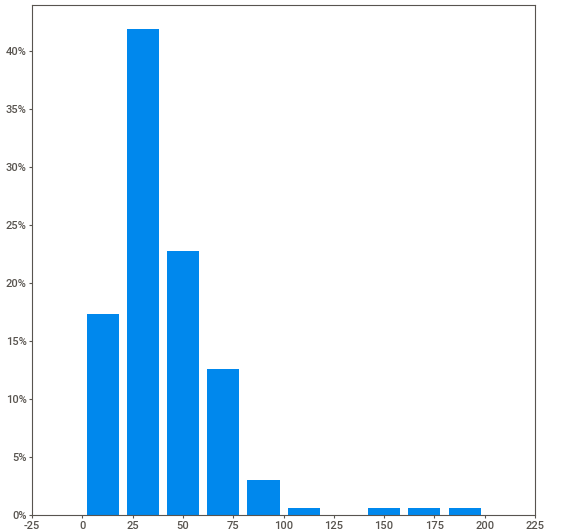
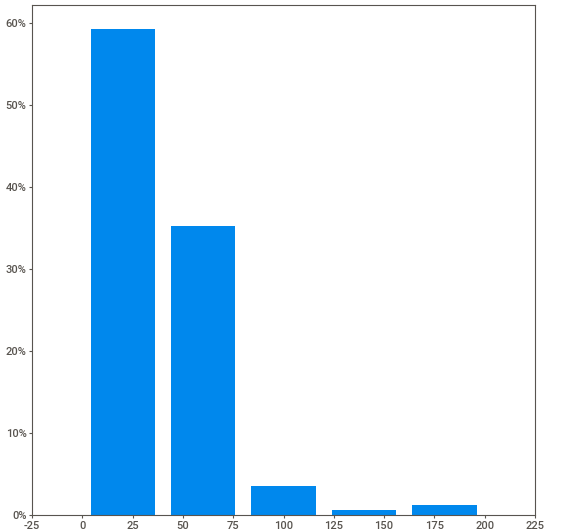
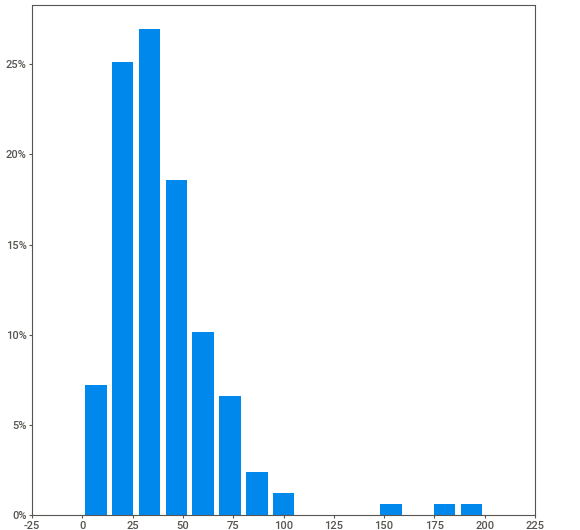
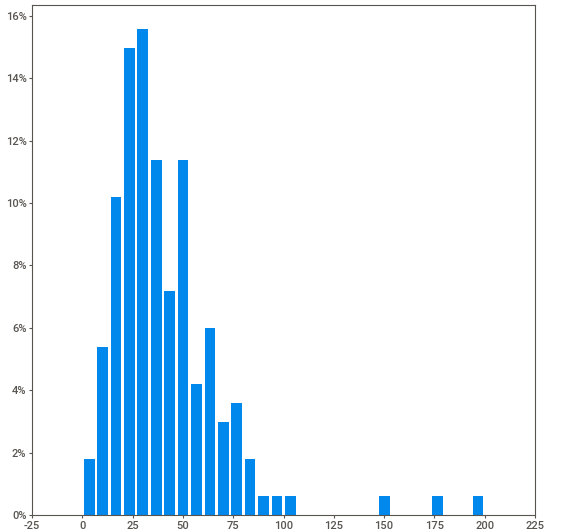
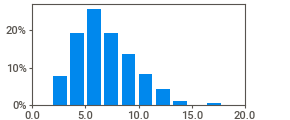
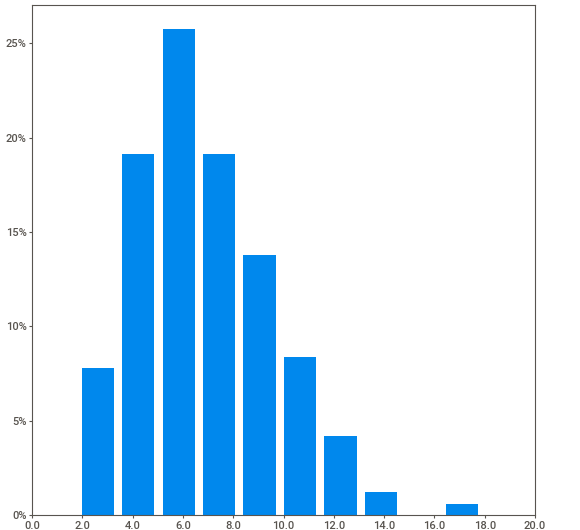
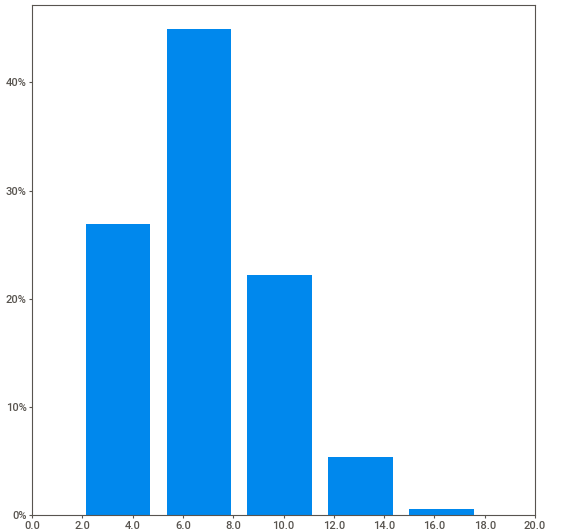
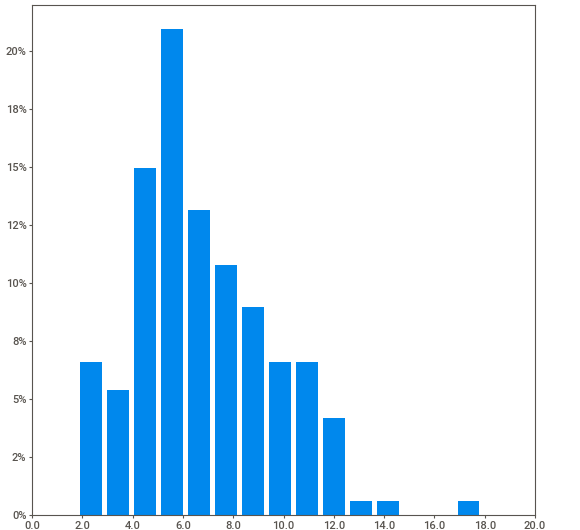
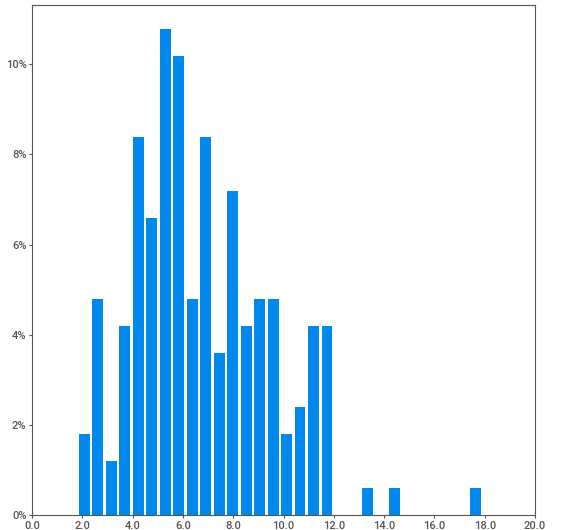
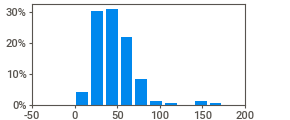
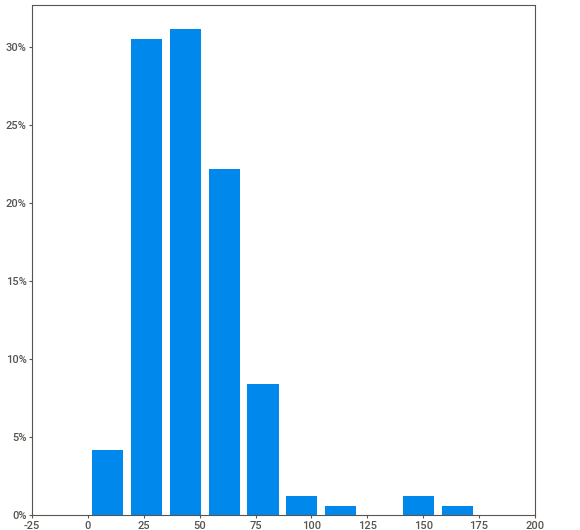
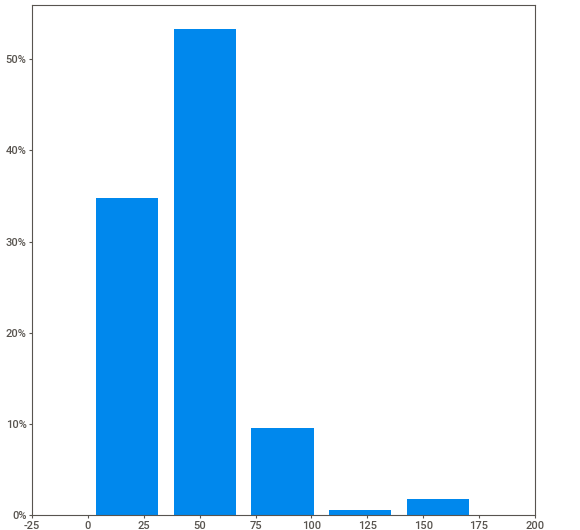
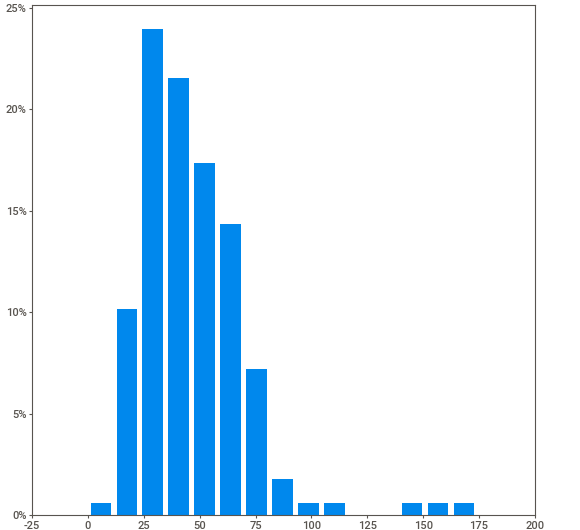
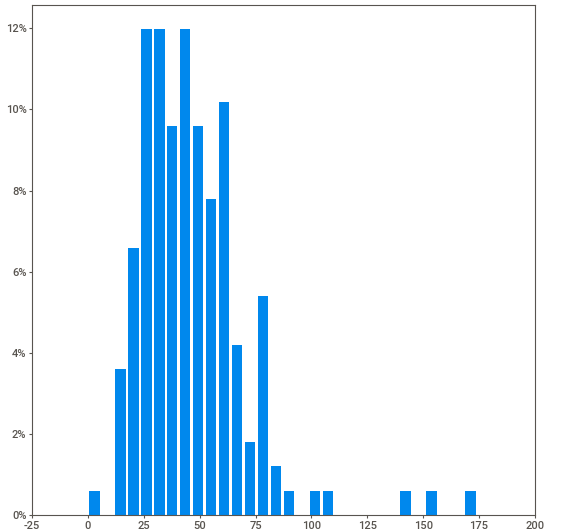
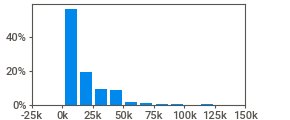
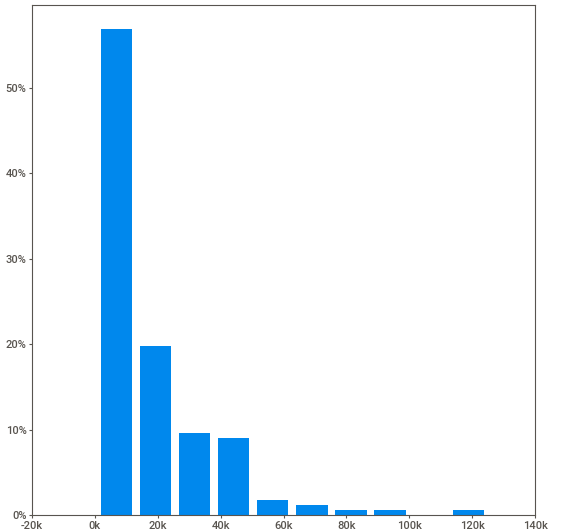
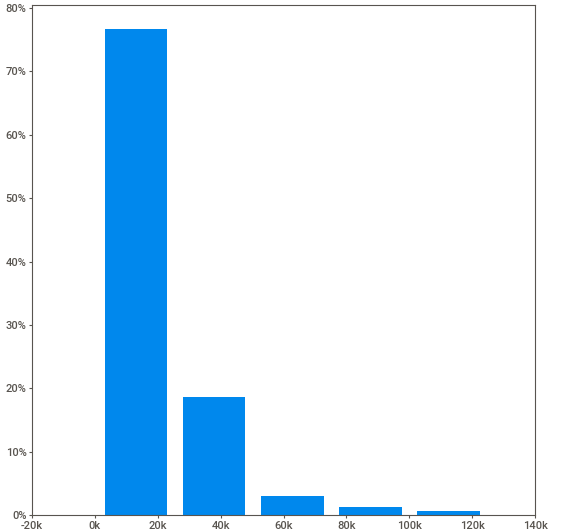
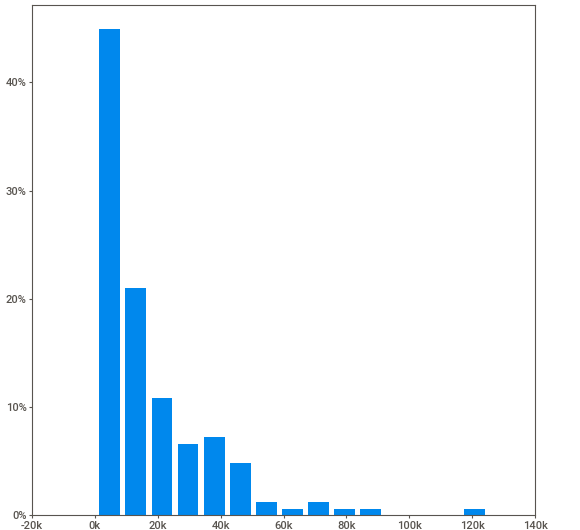
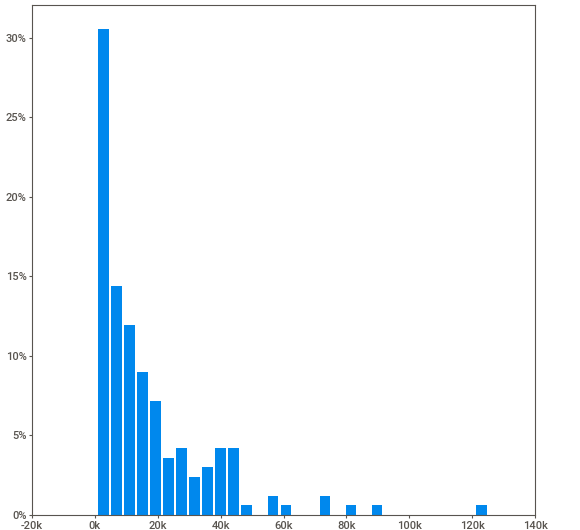
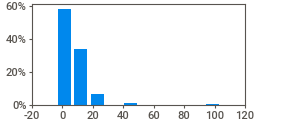
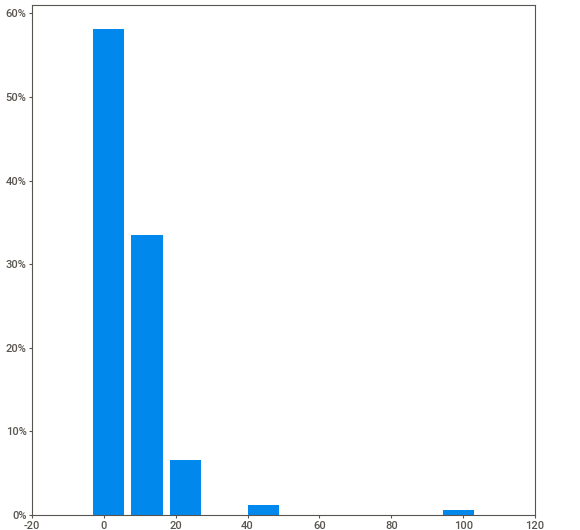
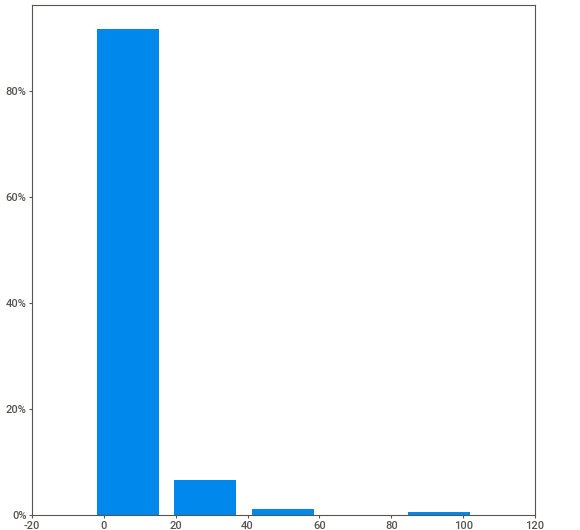
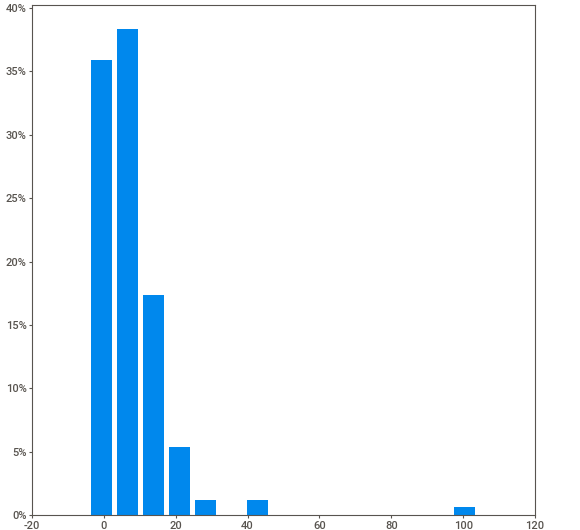
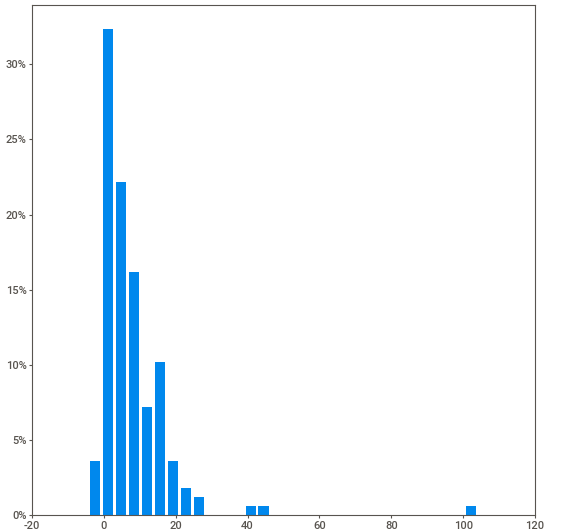
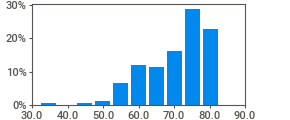
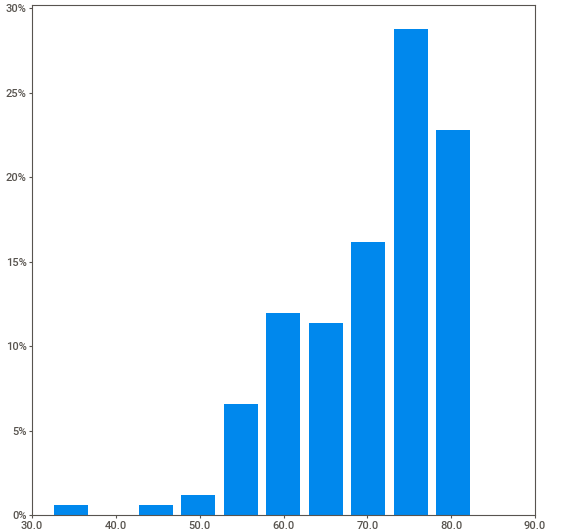
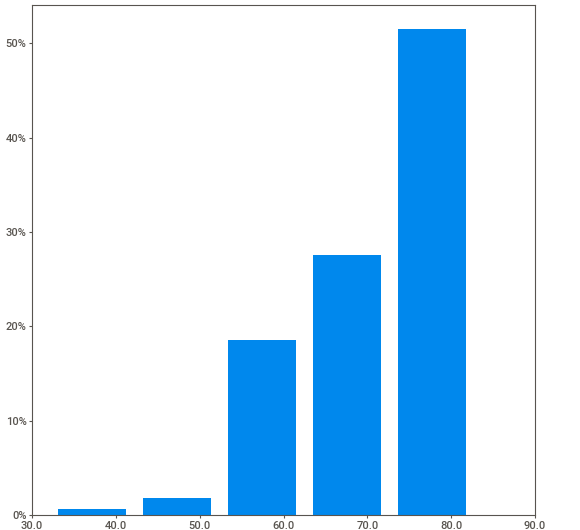
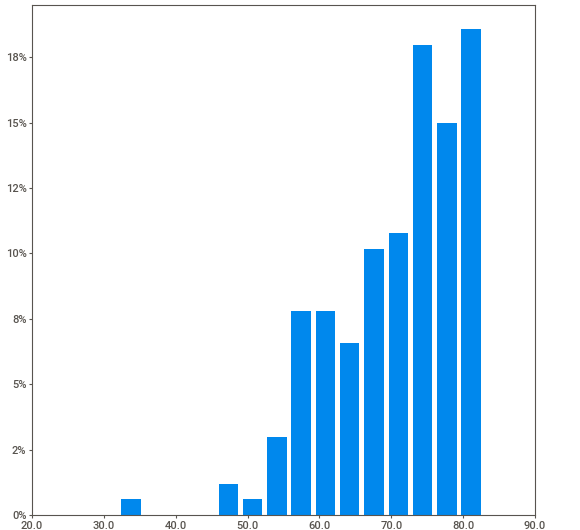
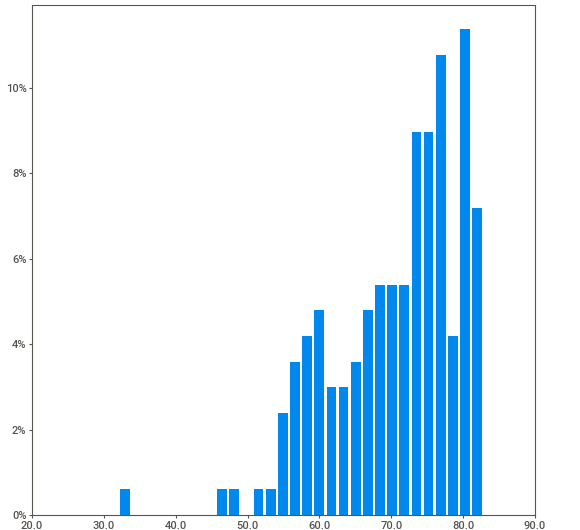
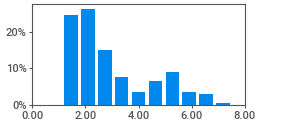
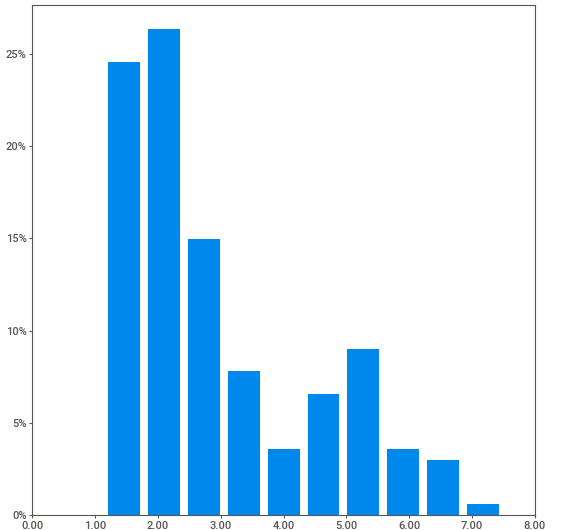
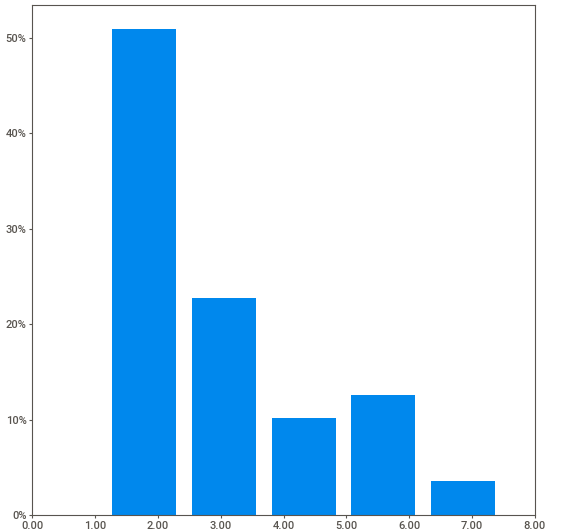
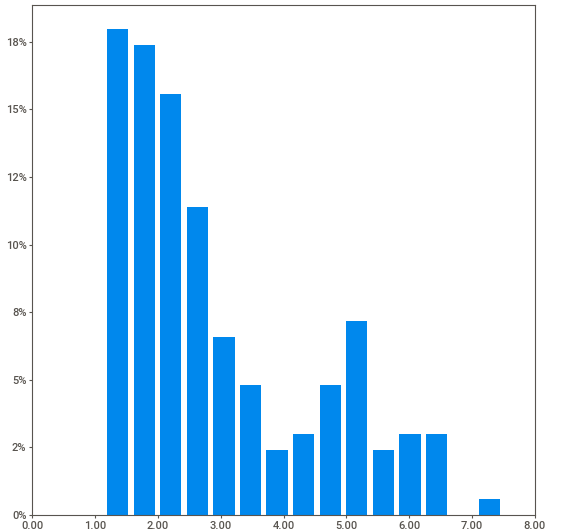
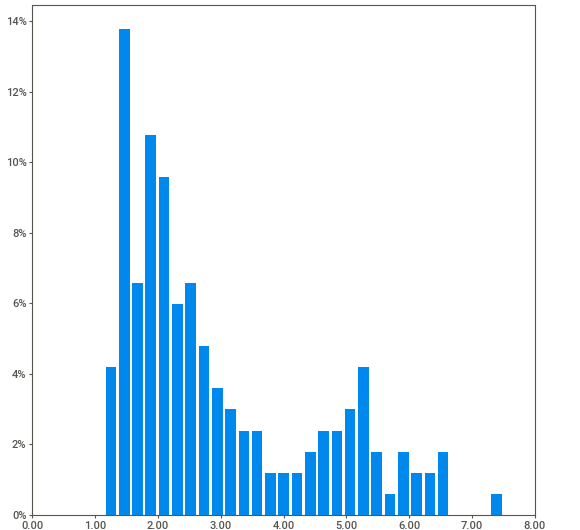
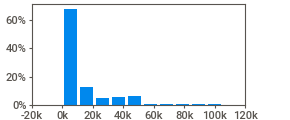
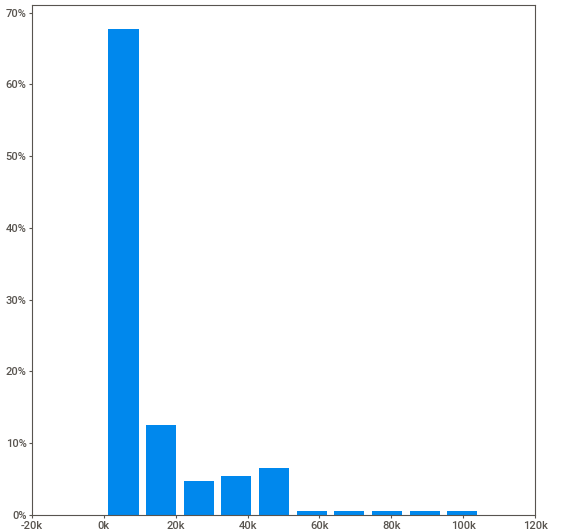
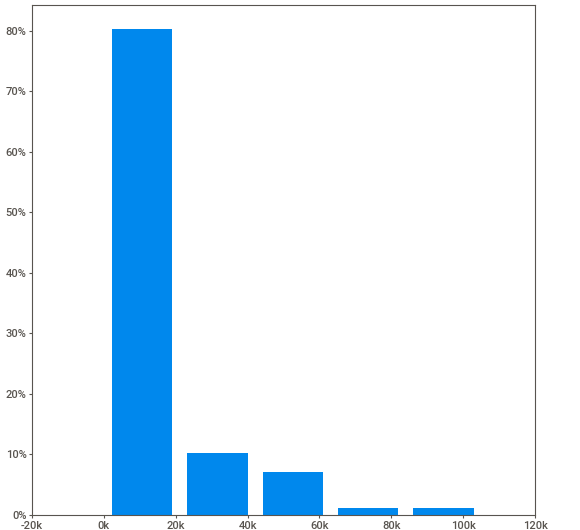
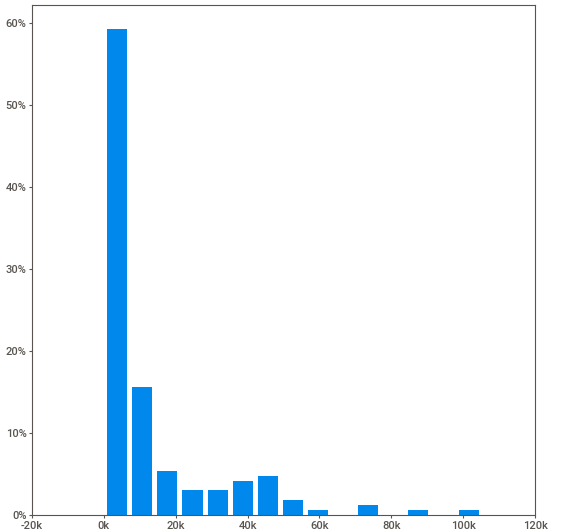
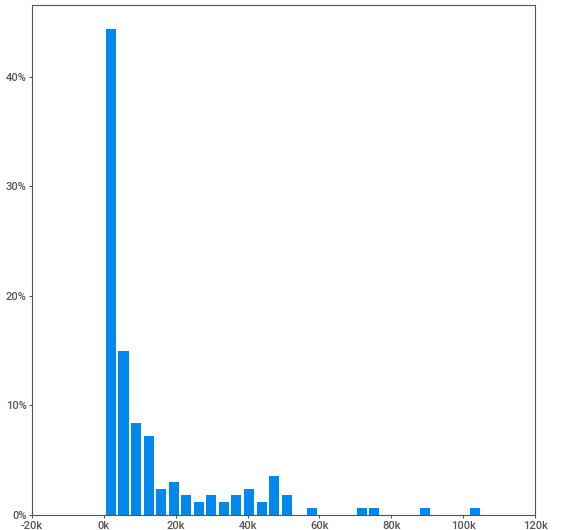
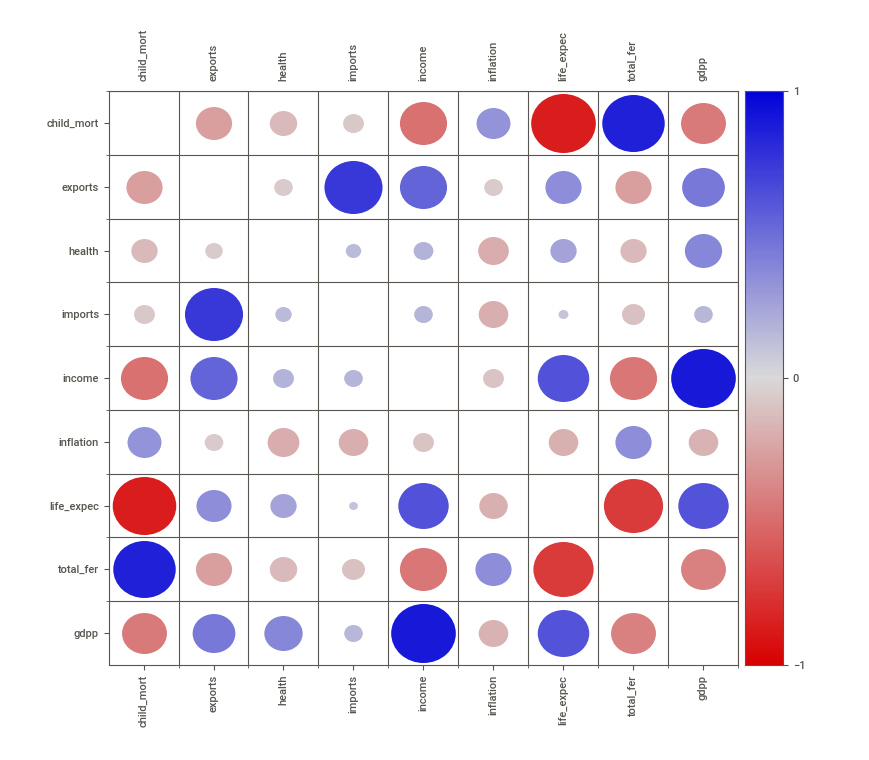
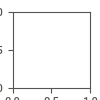

In [12]:
## Make sure you run this cell to see the report on the notebook. Also it can be checked it out on utils folder 'eda_report'
eda_report.show_html(filepath='../utils/eda_report.html', 
            open_browser=False, 
            layout='widescreen', 
            scale=None)

eda_report.show_notebook()

Después de analizar con detenimiento las distribuciones de cada variable y otra información descriptiva relacionada (Que se puede ver en *utils/eda_report.html*), concluimos que todas las variables presentan una variabilidad suficiente como para que aporten información a un modelo de clusterización. En ese sentido, de cara al modelo, sólo es necesario descartar la variable que indica el nombre del país.

En la pestaña 'Associations' del reporte hay un análisis de correlación que nos da un indicio básico a priori de qué podría significar una buena clusterización. Vemos que hay una relación inversa contundente entre expectativa de vida y mortalidad de niños (evidentemente), pero adicionalmente vemos también que la mortalidad en niños también es inversamente proporcional a la cantidad de hijos que tiene cada mujer. También hay una relación inversa entre el gdp(pib) con la mortalidad en niños y la cantidad de hijos por mujer. Estas son condiciones que, intuitivamente, se pueden asociar con niveles de pobreza, así que esperaríamos que el clustering agrupe países que tengan niveles cercanos de estas variables inversamente proporcionales al pib y la expectativa de vida. 

# Planteando Clustering con KMeans

## Encontrar el valor de los clústers

Se planteará un rango de clústers entre 10 y 70 para evaluar las métricas de cada cantidad de clústers en el contexto del método del codo y la gráfica de silueta. Este rango se plantea pensando en que la cantidad de dinero que se quiere repartir no es tanto (en el contexto de las economías de los países), por la tanto es importante tener una segmentación más fina, es decir, con más clusters, pero que no represente casi una individualización.

In [15]:
X = data.drop(columns='country')
X_scaled = scale(X)

In [37]:
inercia = [] 
for i in range(10, 70):
    algoritmo = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)
    algoritmo.fit(X_scaled)
    
    inercia.append(algoritmo.inertia_)

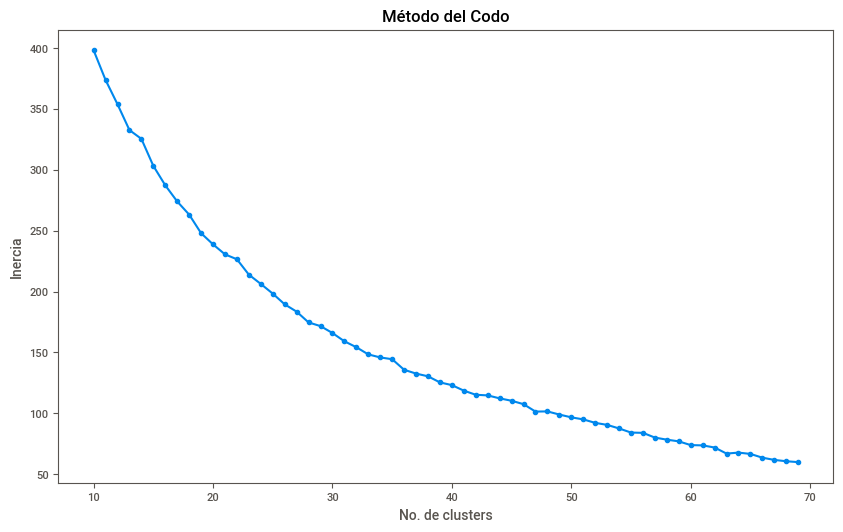

In [38]:
# Método del Codo para identificar el número óptimo de clusters

plt.figure(figsize=[10,6])
plt.title('Método del Codo')
plt.xlabel('No. de clusters')
plt.ylabel('Inercia')
plt.plot(list(range(10, 70)), inercia, marker='o')
plt.show()

Text(0, 0.5, 'Media índices silhouette')

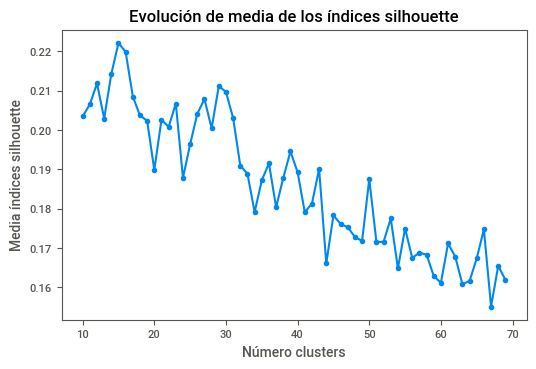

In [40]:
# Método silhouette para identificar el número óptimo de clusters

range_n_clusters = range(10, 70)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    
    modelo_kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 25, random_state=10)
    cluster_labels = modelo_kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
    
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette')

De la gráfica del codo se puede ver que en del rango 30-40 (teniendo en cuenta la subjetividad inherente de estos métodos) existe una cercanía relevante entre los elementos de los clústers, y a partir de ahí el grado de mejora de cercanía no es tan importante.

Dado la cantidad de clústers en el rango planteado (60) no se graficaron las siluetas, pero se planteó la gráfica de evolucióin de las medias de índice de siluetas respecto al número de clústers. Se observa que en el rango 25-35 existe unas buenos métricas para esa similaridad de cada elemento con su clúster, que no es tan distante de las métricas de los valores iniciales del rango, y notoriamente mejores que los valores finales. Adicionalmente, cercano a ese rango está el rango 'óptimo' planteado en la gráfica del codo. 

Elección -> K = 30

## Modelo

In [258]:
model = KMeans(n_clusters = 30, init = 'k-means++', max_iter = 300, n_init = 10)
model.fit(X_scaled)

KMeans(n_clusters=30)

In [43]:
data['Cluster'] = model.labels_

In [44]:
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,21
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,16
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,13
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,24
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,10
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,8


## Representantes

In [46]:
repr, _ = pairwise_distances_argmin_min(model.cluster_centers_, X_scaled)

res = pd.DataFrame(columns=data.columns)
for r in repr:
    res = res.append(data.loc[r])
res

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,1
13,Barbados,14.2,39.5,7.97,48.7,15300,0.321,76.7,1.78,16000,2
81,Kiribati,62.7,13.3,11.30,79.9,1730,1.520,60.7,3.84,1490,3
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,4
106,Mozambique,101.0,31.5,5.21,46.2,918,7.640,54.5,5.56,419,5
82,Kuwait,10.8,66.7,2.63,30.4,75200,11.200,78.2,2.21,38500,6
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.000,60.5,5.84,2330,7
165,Yemen,56.3,30.0,5.18,34.4,4480,23.600,67.5,4.67,1310,8
60,Greece,3.9,22.1,10.30,30.7,28700,0.673,80.4,1.48,26900,9


## Análisis descriptivo de los diferentes clusters

In [53]:
## Países por Cluster
data.groupby('Cluster')['country'].count().sort_values(ascending=False)

Cluster
1     15
16    13
15    12
2     11
5     11
13    11
10    10
19    10
11     8
21     7
25     6
22     6
26     5
8      5
9      5
23     4
0      4
3      4
29     4
12     3
6      3
24     2
17     1
18     1
14     1
20     1
7      1
4      1
27     1
28     1
Name: country, dtype: int64

In [261]:
grouped = data.groupby('Cluster')['gdpp','income','life_expec','inflation','child_mort'].mean().sort_values(by='gdpp').reset_index()
grouped

<ipython-input-261-828a95c4fd36>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped = data.groupby('Cluster')['gdpp','income','life_expec','inflation','child_mort'].mean().sort_values(by='gdpp').reset_index()


,Cluster,gdpp,income,life_expec,inflation,child_mort
0,18,399.000000,1220.000000,55.000000,17.200000,160.000000
1,21,468.857143,1184.714286,57.357143,10.117143,92.700000
2,14,662.000000,1500.000000,32.100000,5.450000,208.000000
3,5,799.000000,1771.818182,56.372727,6.186818,118.009091
4,19,838.500000,2395.000000,63.130000,7.845000,73.250000
5,3,1461.750000,2037.500000,58.350000,3.735000,72.925000
6,7,2330.000000,5150.000000,60.500000,104.000000,130.000000
7,23,2642.000000,4800.000000,70.575000,5.760000,31.025000
8,16,2851.384615,7973.846154,69.992308,12.720000,38.153846
9,13,2955.090909,6207.272727,69.290909,4.561364,32.736364


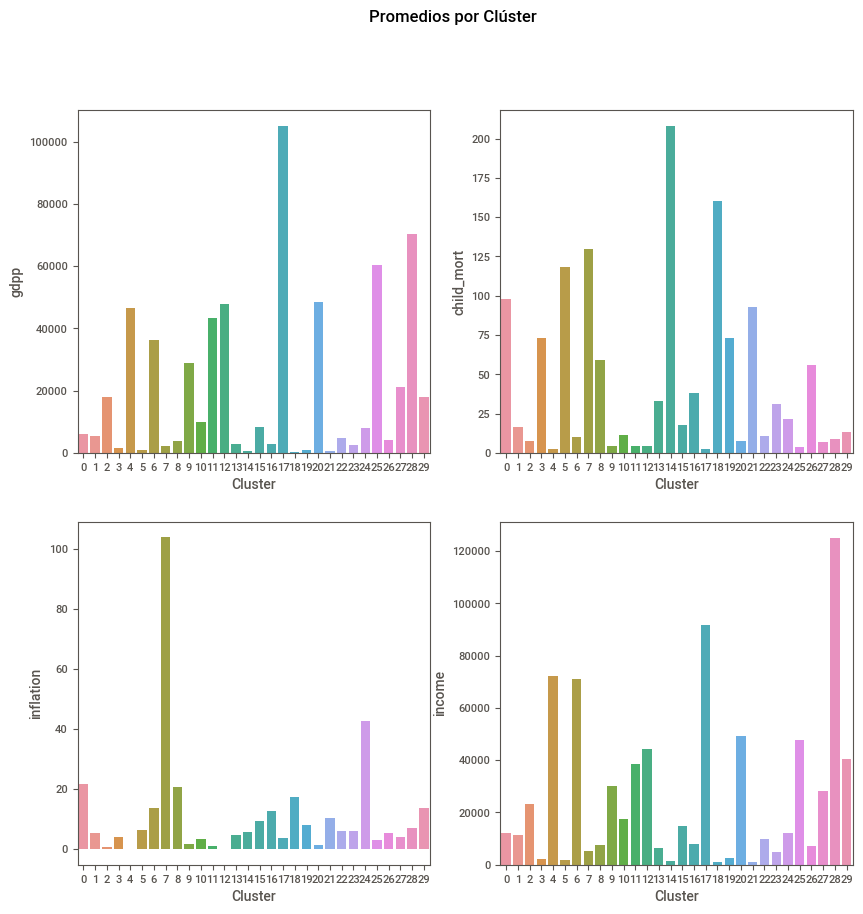

In [276]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
fig.suptitle('Promedios por Clúster')
sns.barplot(x='Cluster',y='gdpp',data=grouped, ax=axes[0,0])
sns.barplot(x='Cluster',y='inflation',data=grouped, ax=axes[1,0])
sns.barplot(x='Cluster',y='child_mort',data=grouped, ax=axes[0,1])
sns.barplot(x='Cluster',y='income',data=grouped, ax=axes[1,1])
plt.show()

Los clústers son coherentes en sus variables. Los que tienen más altos PIB tienen mayor ingreso y baja mortalidad infantil.

In [86]:
## Revisando varios clúster
clusters_de_interes = [18,21,14,5]
for c in clusters_de_interes:
    print(data[data['Cluster']==c])

          country  child_mort  exports  health  imports  income  inflation  \
132  Sierra Leone       160.0     16.8    13.1     34.5    1220       17.2   

     life_expec  total_fer  gdpp  Cluster  
132        55.0        5.2   399       18  
              country  child_mort  exports  health  imports  income  \
0         Afghanistan        90.2    10.00    7.58     44.9    1610   
26            Burundi        93.6     8.92   11.60     39.2     764   
37   Congo, Dem. Rep.       116.0    41.10    7.91     49.6     609   
64      Guinea-Bissau       114.0    14.90    8.50     35.2    1390   
94             Malawi        90.5    22.80    6.59     34.9    1030   
126            Rwanda        63.6    12.00   10.50     30.0    1350   
155            Uganda        81.0    17.10    9.01     28.6    1540   

     inflation  life_expec  total_fer  gdpp  Cluster  
0         9.44        56.2       5.82   553       21  
26       12.30        57.7       6.26   231       21  
37       20.80       

Se puede ver que, efectivamente, los países agrupados con un bajo PIB, también comparten bajos ingresos y baja expectativa de vida. Además, vemos que también tienen una alta mortalidad infantil (Habíamos identificado la relación de esta variable con la pobreza en el análisis de correlación). 
Haciendo un análisis de los clúster con más bajo PIB promedio se puede ver también que estos clúster contienen países de África o países con zonas en conflictos complejos, lo que indica que la agrupación es adecuada.

Adicionalmente vamos a plantear un Clustering Jerárquico para evaluar si el agrupamiento puede mejorar para este problema.

# Clustering Jerárquico

In [89]:
modelo_h = AgglomerativeClustering(
                            affinity = 'euclidean',
                            linkage  = 'ward',
                            distance_threshold = 0,
                            n_clusters         = None
                     )
modelo_h.fit(X=X_scaled)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [90]:
def plot_dendrogram(model, **kwargs):
    '''
    Esta función extrae la información de un modelo AgglomerativeClustering
    y representa su dendograma con la función dendogram de scipy.cluster.hierarchy
    '''
    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot
    dendrogram(linkage_matrix, **kwargs)

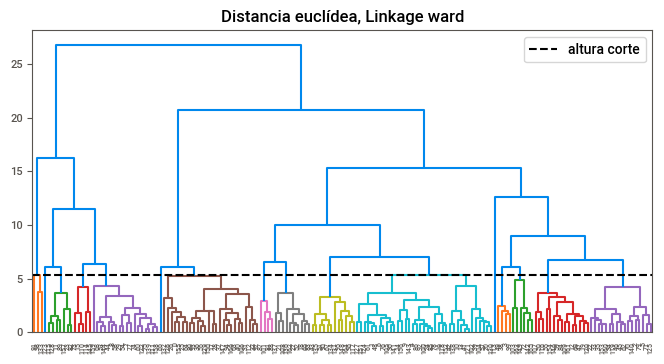

In [93]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
altura_corte = 5.3

plot_dendrogram(modelo_h, color_threshold=altura_corte, ax=ax)
ax.set_title("Distancia euclídea, Linkage ward")
ax.axhline(y=altura_corte, c = 'black', linestyle='--', label='altura corte')
ax.legend()

Text(0, 0.5, 'Media índices silhouette')

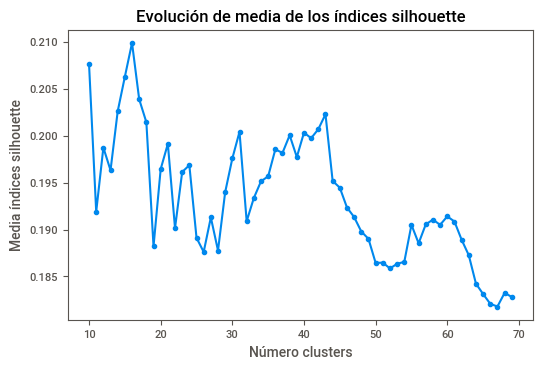

In [94]:
range_n_clusters = range(10, 70)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    affinity   = 'euclidean',
                    linkage    = 'ward',
                    n_clusters = n_clusters
             )

    cluster_labels = modelo.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
    
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette')

En la gráfica de la silueta del clustering jerárquico también se postula 30 como un buen valor, sin embargo en 16 se encuentra la mejor medida distancia entre clúster. Si nos fijamos en la distancia euclídea, parece también confirmar el valor de 16 omo un buen candidato. Así que por estas razones y para ver qué tan diferente se comporta del agrupamiento con 30 previamente hecho se escogerá 16.

Elección -> k=16

In [105]:
modelo_h = AgglomerativeClustering(
                            affinity = 'euclidean',
                            linkage  = 'ward',
                            n_clusters = 16
                     )
modelo_h.fit(X=X_scaled)

AgglomerativeClustering(n_clusters=16)

In [106]:
data_h = data.copy()
data_h['Cluster'] = modelo_h.labels_

In [109]:
## Países por Cluster
data_h.groupby('Cluster')['country'].count().sort_values(ascending=False)

Cluster
0     37
3     26
7     18
4     17
10    15
9     12
8     10
6      7
2      6
5      5
12     4
13     4
1      3
11     1
14     1
15     1
Name: country, dtype: int64

In [110]:
grouped_h = data_h.groupby('Cluster')['gdpp','income','life_expec','inflation','child_mort'].mean().sort_values(by='gdpp')
grouped_h

<ipython-input-110-8249929e9c86>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_h = data_h.groupby('Cluster')['gdpp','income','life_expec','inflation','child_mort'].mean().sort_values(by='gdpp')


,gdpp,income,life_expec,inflation,child_mort
Cluster,,,,,
15,662.000000,1500.000000,32.100000,5.450000,208.000000
3,668.115385,1593.192308,58.215385,7.207885,101.111538
12,1461.750000,2037.500000,58.350000,3.735000,72.925000
10,1978.533333,5190.666667,67.000000,10.504667,56.166667
11,2330.000000,5150.000000,60.500000,104.000000,130.000000
8,3361.600000,6341.000000,63.220000,5.733000,39.790000
2,4506.666667,7768.333333,68.950000,28.566667,45.950000
13,6142.500000,12027.500000,62.400000,21.725000,97.825000
4,7202.941176,13867.058824,74.594118,11.091176,20.282353


In [111]:
## Revisando varios clúster
clusters_de_interes = [15,3,12,10]
for c in clusters_de_interes:
    print(data_h[data_h['Cluster']==c])

   country  child_mort  exports  health  imports  income  inflation  \
66   Haiti       208.0     15.3    6.91     64.7    1500       5.45   

    life_expec  total_fer  gdpp  Cluster  
66        32.1       3.33   662       15  
                      country  child_mort  exports  health  imports  income  \
0                 Afghanistan        90.2    10.00    7.58     44.9    1610   
17                      Benin       111.0    23.80    4.10     37.2    1820   
25               Burkina Faso       116.0    19.20    6.74     29.6    1430   
26                    Burundi        93.6     8.92   11.60     39.2     764   
28                   Cameroon       108.0    22.20    5.13     27.0    2660   
31   Central African Republic       149.0    11.80    3.98     26.5     888   
32                       Chad       150.0    36.80    4.53     43.5    1930   
36                    Comoros        88.2    16.50    4.51     51.7    1410   
37           Congo, Dem. Rep.       116.0    41.10    7.91  

La agrupación con clúster jerárquico también es buena en el sentido que es capaz de agrupar los países que comparten parámetros que sugieren pobreza, y que por cultura general, hemos visto que predominan en áfrica y países en conflicto. Precisamente los clúster 15,3,12,10 que son los que menos PIB en promedio tienen, son los que agrupan a países con estas características.

Respecto al clústering previo, optaremos por trabajar con el clúster jerárquico puesto que tiene menos clústers que sólo contienen un único país y, en general, una mejor distribución de países en los clústers, por lo que podría ser más fácil para la ONG identificar grupos amplios de países que tienen las mayores necesidades.

## Análisis de PCA en el modelo escogido

Se plantea reducir el tamaño del dataset a 3 componentes principales

In [234]:
pca = PCA(n_components=3)
pca = pca.fit(X_scaled)

In [172]:
acum_var = pca.explained_variance_ratio_.cumsum()

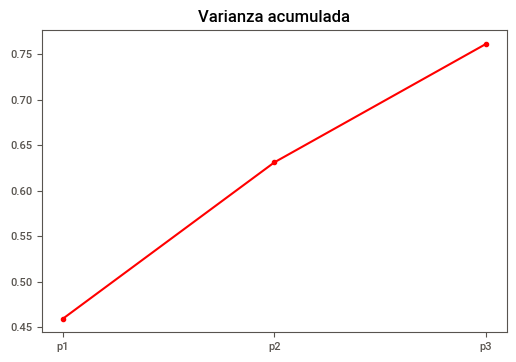

In [173]:
plt.title('Varianza acumulada')
plt.plot(['p1','p2','p3'], acum_var, 'r-o')

Tres componentes principales explican aproximadamente el 75% de la varianza. Aunque sería ideal que fuera más alta (Se podrían aumentar las componentes principales) es una cantidad representativa que además nos permitirá graficar la posición de los clusters en el espacio.

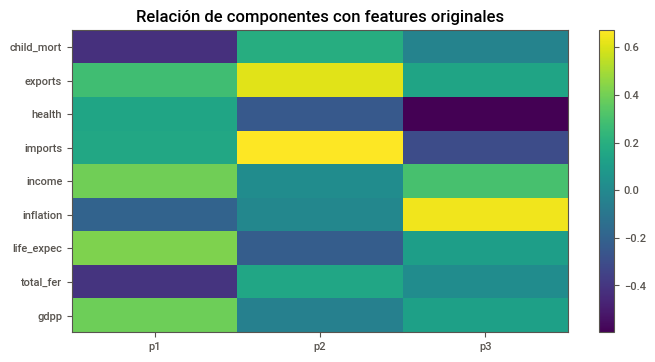

In [235]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
componentes = pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(np.arange(9),X.columns.values)
plt.xticks(np.arange(3), ['p1','p2','p3'])
plt.title('Relación de componentes con features originales')
plt.colorbar()
plt.show()

In [236]:
pca = pca.fit_transform(X_scaled)
pca = pd.DataFrame(columns=['p1','p2','p3'], data=pca)

In [237]:
pca_h = AgglomerativeClustering(
                            affinity = 'euclidean',
                            linkage  = 'ward',
                            n_clusters = 16
                     )
pca_h.fit(X=pca)

AgglomerativeClustering(n_clusters=16)

In [238]:
pca['Cluster'] = pca_h.labels_

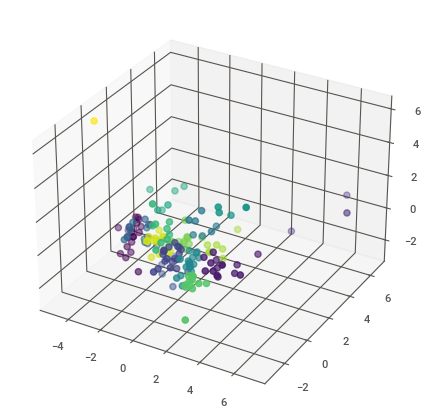

In [239]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(pca['p1'], pca['p2'], pca['p3'], c=pca['Cluster'])
plt.show()

## Pipeline

In [247]:
pipe = Pipeline(steps=
                   [('scaler', StandardScaler()),
                    ('pca', PCA(n_components=3)),
                    ('h_kmeans', AgglomerativeClustering(affinity = 'euclidean', linkage  = 'ward', n_clusters = 16)
                    )])

In [251]:
pipe.fit_predict(X)

array([ 0,  3, 10,  9,  7, 10,  3, 11,  1, 10,  7,  6, 14,  7,  6,  1, 12,
        0, 12, 14,  7, 12,  3,  8,  7,  0,  0, 12,  0, 11, 12,  0,  0,  7,
        3,  3,  5,  0,  9,  7,  0,  7,  1,  1,  1,  3,  3, 14,  3,  9,  5,
       13, 12,  1, 11,  9,  5,  3, 11,  5, 11,  3, 14,  0,  0, 12,  0, 13,
        1, 14, 10, 10, 14,  1,  7, 11,  3, 11, 12, 10,  5,  4,  8, 12, 14,
        7,  7,  4,  4,  6, 13,  2,  7,  5,  0,  6, 13,  0,  2,  9,  7,  4,
        4,  9,  7, 14,  0,  5, 12, 14,  1, 11,  0, 15,  1,  6,  5, 13, 12,
        3, 14,  7, 11,  8,  3, 10,  0, 14,  6,  5,  7, 13,  0,  2, 13,  1,
       12, 14,  1, 11, 10,  3,  5,  3,  1,  1, 14,  0,  6,  5,  4, 14,  7,
        3, 12,  0,  3,  8, 11, 11,  3, 14, 12, 10, 12,  5,  0],
      dtype=int64)

In [253]:
joblib.dump(pipe, '../models/pipeline_hierarchical.pkl')

['../models/pipeline_hierarchical.pkl']